# 第14章　NumPy：基本とシミュレーション

## はじめに

In [1]:
%pip install -q japanize-matplotlib-jlite
import japanize_matplotlib_jlite
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## `NumPy`：`array`（配列）

### 配列の作成方法

コード14.2.1

In [2]:
l0 = [0, 1, 2, 3, 4]
arr0 = np.array(l0)
arr0

array([0, 1, 2, 3, 4])

コード14.2.2

In [3]:
l1 = [5, 6, 7, 8, 9]
l2 = [10, 11, 12, 13, 14]
l3 = [15, 16, 17, 18, 19]
lst = [l0, l1, l2, l3]
arr1 = np.array(lst)
arr1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

コード14.2.3

In [4]:
print( "arr0:", arr0.ndim )
print( "arr1:", arr1.ndim )

arr0: 1
arr1: 2


コード14.2.4

In [5]:
print( "arr0:", arr0.shape )
print( "arr1:", arr1.shape )

arr0: (5,)
arr1: (4, 5)


コード14.2.5

In [6]:
arr2 = np.array([l0])
print( arr2.shape )
arr2

(1, 5)


array([[0, 1, 2, 3, 4]])

### 一つの要素の抽出方法

コード14.2.6

In [7]:
print(arr0[2])

2


コード14.2.7

In [8]:
print(arr1[2, -1])

14


コード14.2.8

In [9]:
print( arr2[0, 1] )

1


### スライシングによる要素抽出

コード14.2.9

In [10]:
arr0[1:-1]

array([1, 2, 3])

コード14.2.10

In [11]:
arr1[:, 1:3]

array([[ 1,  2],
       [ 6,  7],
       [11, 12],
       [16, 17]])

### リストを使う要素抽出

コード14.2.11

In [12]:
lst0 = [1, 3, -1]

arr0[lst0]

array([1, 3, 4])

コード14.2.12

In [13]:
lst_row = [0, 2, -1]
lst_col = [0, 2, -1]
arr1[lst_row, lst_col]

array([ 0, 12, 19])

## ベクトル化演算

コード14.3.1

In [14]:
m1 = np.array([[1, 1],
               [2, 2]])

コード14.3.2

In [15]:
m2 = np.array([[3, 3],
               [4, 4]])

コード14.3.3

In [16]:
m1 + m2

array([[4, 4],
       [6, 6]])

コード14.3.4

In [17]:
m1 - m2

array([[-2, -2],
       [-2, -2]])

コード14.3.5

In [18]:
m1 ** 2

array([[1, 1],
       [4, 4]])

コード14.3.6

In [19]:
m1 * m2

array([[3, 3],
       [8, 8]])

コード14.3.7

In [20]:
m2 / m1

array([[3., 3.],
       [2., 2.]])

コード14.3.8

In [21]:
0.5 * m2
# m2 / 2

array([[1.5, 1.5],
       [2. , 2. ]])

コード14.3.9

In [22]:
np.log(m1)

array([[0.        , 0.        ],
       [0.69314718, 0.69314718]])

コード14.3.10

In [23]:
np.exp(m1)

array([[2.71828183, 2.71828183],
       [7.3890561 , 7.3890561 ]])

コード14.3.11

In [24]:
0.5 * m1 * ( ( np.exp(m2)+1 ) ** 2 - 1 ) + 2 * m1 * np.log(m2)

array([[ 223.99715825,  223.99715825],
       [3095.69946455, 3095.69946455]])

### ブロードキャスト

コード14.3.12

In [25]:
m = np.array([[1, 2],
              [10, 20]])
10 + m

array([[11, 12],
       [20, 30]])

コード14.3.13

In [26]:
a = np.array([1, 2])
m - a

array([[ 0,  0],
       [ 9, 18]])

## ランダム変数

### `np.random`モジュール

コード14.4.1

In [27]:
rng = np.random.default_rng(123)

### 正規分布

コード14.4.2

In [28]:
rng.normal(1, 5, size=2)

array([-3.94560675, -0.83893326])

コード14.4.3

In [29]:
rng.normal( size=(2,4) )

array([[ 1.28792526,  0.19397442,  0.9202309 ,  0.57710379],
       [-0.63646365,  0.54195222, -0.31659545, -0.32238912]])

コード14.4.4

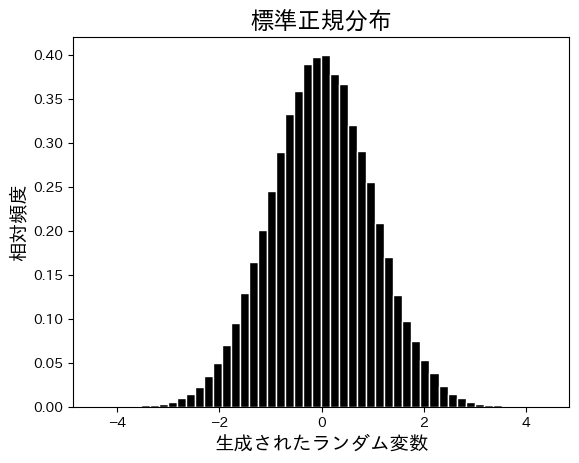

In [30]:
val = rng.normal( size=100_000 )

plt.hist(val, bins=50,
         color="black",
         edgecolor="white",
         density=True)
plt.xlabel("生成されたランダム変数",
           size=14)
plt.ylabel("相対頻度", size=14)
plt.title("標準正規分布", size=17)
plt.show()

コード14.4.5

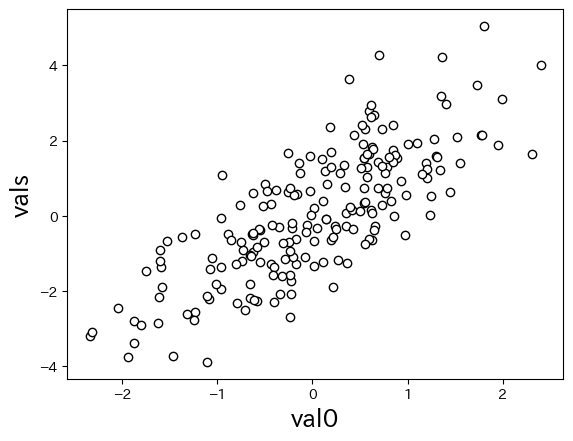

In [31]:
val = rng.normal( size=(200, 2) )
val0 = val[:,0]
val1 = val[:,1]
vals = 1.5 * val0 + val1

plt.scatter(val0, vals,
            color="white",
            edgecolor="black")
plt.xlabel("val0", size=18)
plt.ylabel("vals", size=18)
plt.show()

### 一様分布

コード14.4.6

In [32]:
rng.uniform(-5, 5, size=2)

array([0.5261005 , 0.78244374])

コード14.4.7

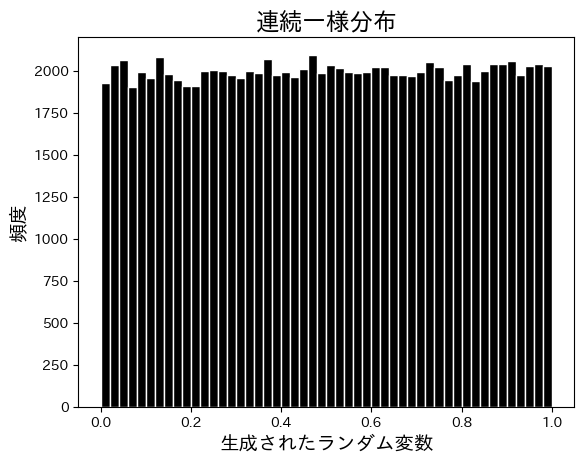

In [33]:
val = rng.uniform( size=100_000 )

plt.hist(val, bins=50,
         color="black",
         edgecolor="white")
plt.xlabel("生成されたランダム変数", size=14)
plt.ylabel("頻度", size=14)
plt.title("連続一様分布", size=17)
plt.show()

## 統計関連の関数

### 例

コード14.5.1

In [34]:
dic = {"x":[1, 2, 3, np.nan],
       "y":[4, -1, 6, 8]}
df_nan = pd.DataFrame(dic)
df_nan

,x,y
0,1.0,4
1,2.0,-1
2,3.0,6
3,NaN,8


コード14.5.2

In [35]:
df = df_nan.dropna()
df

,x,y
0,1.0,4
1,2.0,-1
2,3.0,6


コード14.5.3

In [36]:
arr_nan = df_nan.to_numpy()
arr_nan

array([[ 1.,  4.],
       [ 2., -1.],
       [ 3.,  6.],
       [nan,  8.]])

コード14.5.4

In [37]:
arr = df.to_numpy()
arr

array([[ 1.,  4.],
       [ 2., -1.],
       [ 3.,  6.]])

### 算術平均・標準偏差・分散

コード14.5.5

In [38]:
print( arr.mean() )

2.5


コード14.5.6

In [39]:
print( arr.mean(axis=0) )

[2. 3.]


コード14.5.7

In [40]:
print(
    arr_nan.mean(axis=0)
)

[ nan 4.25]


コード14.5.8

In [41]:
df.mean()

,0
x,2.0
y,3.0


コード14.5.9

In [42]:
print(
    arr.var(axis=0, ddof=1)
)

[ 1. 13.]


コード14.5.10

In [43]:
print(
    arr.std(axis=0, ddof=1)
)

[1.         3.60555128]


コード14.5.11

In [44]:
df.var()

,0
x,1.0
y,13.0


コード14.5.12

In [45]:
df.std()

,0
x,1.000000
y,3.605551


## シミュレーション：最小二乗法

### 目的

### 不偏性が成立するための条件

### シミュレーションの進め方

### シミュレーション

コード14.6.1

In [46]:
def create_samples(n=30, N=100_000, su=2, seed=None):
    """
    引数：
        n：標本の大きさ
        N：標本数
        s：誤差項の標準偏差
        seed：シード値
    戻り値：
        x：説明変数（二次元配列）
        y：被説明変数（二次元配列）
    """

    # 真の値 -------------------------------
    alpha, beta = 1, 2

    # 標本の生成 ---------------------------
    rng = np.random.default_rng(seed)

    # 説明変数（各列が1つの標本）, shape = (n,N)
    x = rng.uniform(5, 30, size=(n, N))

    # 誤差項（各列が1つの標本に対応する）, shape = (n,N)
    u = rng.normal(loc=0, scale=su, size=(n, N))

    # 被説明変数（各列が1つの標本）, shape = (n,N)
    y = alpha + beta * x + u

    return x, y

コード14.6.2

In [47]:
def estimate_ab(x, y):
    """
    引数：
        x：説明変数（二次元配列）
        y：被説明変数（二次元配列）
    戻り値：
        ahat：定数項の推定値（一次元配列）
        bhat：スロープ係数の推定値（一次元配列）
    """

    # 平均（各標本ごと：合計N個）--------------
    x_mean = x.mean(axis=0)  # shape = (N,)
    y_mean = y.mean(axis=0)  # shape = (N,)

    # 偏差： shape = (n,N) ----------------
    x_dev = x - x_mean
    y_dev = y - y_mean

    # 推定値（N個）, shape = (N,) ----------
    bhat = (
             ( y_dev * x_dev ).sum(axis=0) /
             ( x_dev**2 ).sum(axis=0)
           )
    ahat = y_mean - bhat * x_mean

    return ahat, bhat

コード14.6.3

In [48]:
x_sample, y_sample = create_samples(seed=123)
ahat, bhat = estimate_ab(x_sample, y_sample)

コード14.6.4

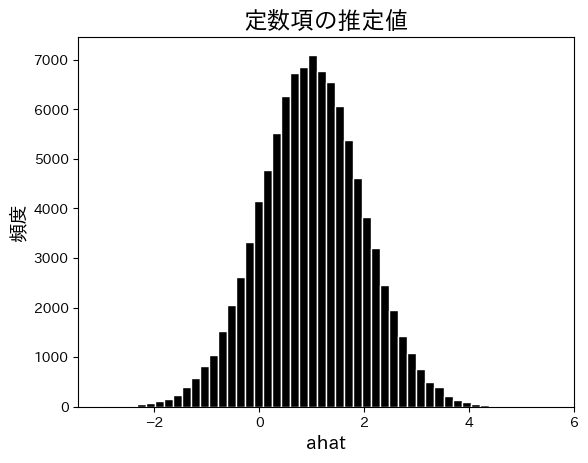

In [49]:
plt.hist(ahat, bins=50,
         color="black",
         edgecolor="white")

plt.xlabel("ahat", size=14)
plt.ylabel("頻度", size=14)
plt.title("定数項の推定値", size=17)
plt.show()

コード14.6.5

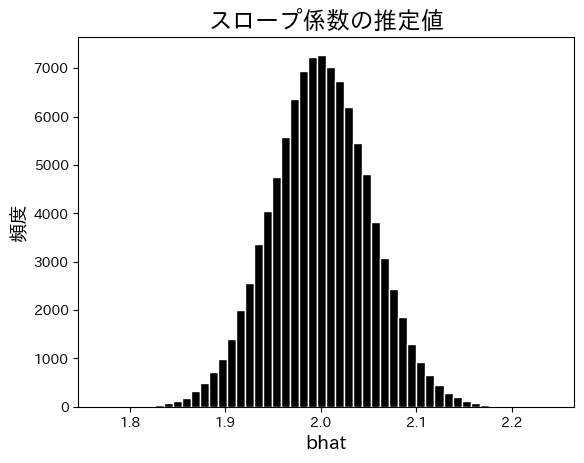

In [50]:
plt.hist(bhat, bins=50,
         color="black",
         edgecolor="white")

plt.xlabel("bhat", size=14)
plt.ylabel("頻度", size=14)
plt.title("スロープ係数の推定値", size=17)
plt.show()

コード14.6.6

In [51]:
print(f"定数項: {ahat.mean()}")
print(f"スロープ係数: {bhat.mean()}")

定数項: 0.9994112988373901
スロープ係数: 2.0000291284346385
